In [1]:
import pandas as pd
import gtfs_kit as gk
import matplotlib as mpl
import matplotlib.pyplot as plt
import helper #homemade function file helper.py
import numpy as np


In [2]:
feed = gk.feed.read_feed('../general_data_analytics.zip',dist_units="km")

In [3]:
routes = gk.routes.get_routes(feed)
stop_times = feed.get_stop_times()
trips = feed.get_trips()
stops = feed.get_stops()
shapes = feed.shapes
calendar_dates = feed.calendar_dates
calendar = feed.calendar

# Collecting a single week data

## Select trips between Mon 02-Oct-2023 and 08-Oct-2023


In [4]:
## Collecting all service date of trips on those days
year_calendar_dates = calendar_dates.loc[(calendar_dates['date'] >= '20220101') & 
                                    (calendar_dates['date'] <= '20221231') ]


In [5]:
year_calendar_dates

,service_id,date
19950,3233_224114,20220103
19951,3233_224114,20220104
19952,3233_224114,20220105
19953,3233_224114,20220107
19954,3233_224114,20220110
...,...,...
27912,4118_237648,20221227
27913,4118_237648,20221228
27914,4118_237648,20221229
27915,4118_237648,20221230


In [6]:
# Removing data outside the selected year 

## Creating new calendar and collect service date from previous new calendar_dates with drop duplicates
year_calendar = calendar.iloc[0:0]
service_id_list = list(dict.fromkeys(year_calendar_dates['service_id']))

for service_id in service_id_list:
    row  = calendar.loc[calendar['service_id'] == service_id]
    year_calendar = pd.concat([year_calendar, row],
                      ignore_index = True)

## Creating new trips dataframe and collect trips using the list of service id
year_trips = trips.iloc[0:0]

for service_id in service_id_list:
    row  = trips.loc[trips['service_id'] == service_id]
    year_trips = pd.concat([year_trips, row],
                      ignore_index = True)
    
## Creating list of shapes_id,route_id,trips_id from sw_trips
route_id_list = list(dict.fromkeys(year_trips['route_id']))
shape_id_list = list(dict.fromkeys(year_trips['shape_id']))
trip_id_list = list(dict.fromkeys(year_trips['trip_id']))

## Creating new route dataframe
year_routes = routes.iloc[0:0]

for route_id in route_id_list:
    row = routes.loc[routes['route_id']==route_id]
    year_routes = pd.concat([year_routes,row],ignore_index=True)

## Creating new shape dataframe
year_shapes = shapes.iloc[0:0]

for shape_id in shape_id_list:
    row = shapes.loc[shapes['shape_id']==shape_id]
    year_shapes = pd.concat([year_shapes, row],ignore_index = True)

## Creating new stop_times dataframe
year_stop_times = stop_times.iloc[0:0]

for trip_id in trip_id_list:
    row = stop_times.loc[stop_times['trip_id'] == trip_id]
    year_stop_times = pd.concat([year_stop_times,row],ignore_index = True)
stop_id_list = list(dict.fromkeys(year_stop_times['stop_id']))

## Creating new stop dataframe, should be equal at this point 
## but we do it for safe reasons
year_stops = stops.iloc[0:0]

for stop_id in stop_id_list:
    row = stops.loc[stops['stop_id']==stop_id]
    year_stops = pd.concat([year_stops,row],ignore_index = True)

# We performe data analytics on the monday

In [7]:
# Join the dataset for easy at use
year_analytics = year_trips
year_analytics = pd.merge(year_analytics, year_calendar_dates, on=['service_id','service_id'])
year_analytics = pd.merge(year_analytics, year_stop_times, on=['trip_id','trip_id'])
year_analytics = year_analytics.drop(['trip_headsign','direction_id','shape_id',
                                     'arrival_time', 'departure_time','shape_dist_traveled',
                                     'time_diff', 'speed', 'dist_diff','route_id'
                                     ], axis='columns')
year_analytics_save_copy = year_analytics.copy()

In [8]:
year_analytics = year_analytics.groupby(['trip_id','service_id','date']).max('stop_sequence').reset_index()

In [9]:
week_division_dates = helper.calendar_2022()

In [10]:
result = pd.DataFrame(columns=['corse_totali', 'corse_veloci', 'corse_medie', 'corse_lente'], index=range(len(week_division_dates)-1)).fillna(0)
result.index += 1

for i in range(len(week_division_dates)-1):
    ## Collecting all service date of trips on those days
    year_calendar_dates = calendar_dates.loc[(calendar_dates['date'] >= '20220101') & 
                                    (calendar_dates['date'] <= '20221231') ]
    temp_analytics = year_analytics.loc[(year_analytics['date'] >= week_division_dates[i]) &
                                       (year_analytics['date'] <= week_division_dates[i+1])]
    for index, row  in temp_analytics.iterrows():
        result.at[i+1,'corse_totali'] += 1
        if(row.stop_sequence <= 10):
            result.at[i+1,'corse_veloci'] += 1
        if(row.stop_sequence > 10 and row.stop_sequence <= 20):
            result.at[i+1,'corse_medie'] += 1
        if(row.stop_sequence > 20):
            result.at[i+1,'corse_lente'] += 1

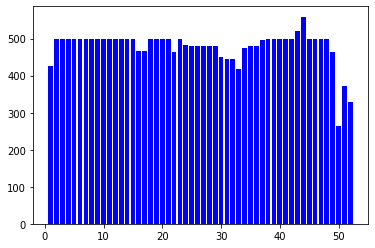

In [11]:
# Plot total 
plt.bar(result.index, result['corse_totali'], color='b')
plt.show()

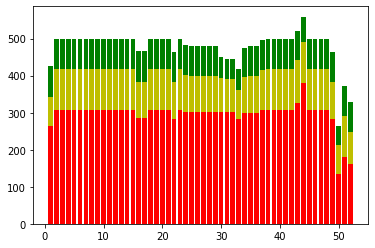

In [17]:
plt.bar(result.index, result['corse_veloci'], color='r')
plt.bar(result.index, result['corse_medie'], bottom=result['corse_veloci'], color='y')
plt.bar(result.index, result['corse_lente'],bottom=result['corse_veloci']+result['corse_medie'], color='g')
plt.show()

In [13]:
print(result)

    corse_totali  corse_veloci  corse_medie  corse_lente
1            426           264           79           83
2            500           307          112           81
3            500           307          112           81
4            500           307          112           81
5            500           307          112           81
6            500           307          112           81
7            500           307          112           81
8            500           307          112           81
9            500           307          112           81
10           500           307          112           81
11           500           307          112           81
12           500           307          112           81
13           500           307          112           81
14           500           307          112           81
15           500           307          112           81
16           466           286           98           82
17           466           286 